## 27. 二叉树的镜像

操作给定的二叉树，将其变换为源二叉树的镜像
<img src="images/img27_a.png" style="width: 300px;"/>

### 分析
观察到镜像后的二叉树就是不断地对第一棵树做`left`和`right sub-tree`的交换。
<img src="images/img27_b.png" style="width: 500px;"/>
[//]: # (<img src="images/img25.png" style="width: 400px;"/>)

In [1]:
class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None

In [7]:
def mirror(root):
    if root is None:
        return
    if root.left is None and root.right is None:
        return

    root = swap_left_right(root)

    mirror(root.left)
    mirror(root.right)

    return root

def swap_left_right(root):
    if root is None:
        return None

    left = root.left
    right = root.right

    root.left = right
    root.right = left

    return root

### Test and visualization

/Users/lander14/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


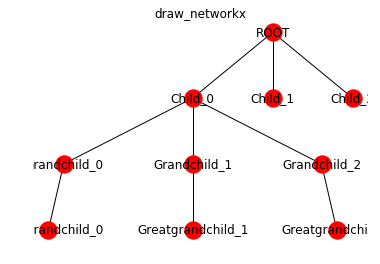

In [6]:
import networkx as nx
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
import matplotlib.pyplot as plt

G = nx.DiGraph()

G.add_node("ROOT")

for i in range(3):
    G.add_node("Child_%i" % i)
    G.add_node("Grandchild_%i" % i)
    G.add_node("Greatgrandchild_%i" % i)

    G.add_edge("ROOT", "Child_%i" % i)
#     G.add_edge("Child_%i" % i, "Grandchild_%i" % i)
    G.add_edge("Child_0", "Grandchild_%i" % i)
    G.add_edge("Grandchild_%i" % i, "Greatgrandchild_%i" % i)

# write dot file to use with graphviz
# run "dot -Tpng test.dot >test.png"
# write_dot(G,'test.dot')

# same layout using matplotlib with no labels
plt.title('draw_networkx')
pos = graphviz_layout(G, prog='dot')
nx.draw(G, pos, with_labels=True, arrows=False)
plt.show()

In [2]:
def has_subtree(pRoot1, pRoot2):
    result = False

    # recursively traverse tree1 and compare root1 and root2
    if pRoot1 is not None and pRoot2 is not None:
        if pRoot1.val == pRoot2.val:
            # if they match, check left and right sub-tree
            result = does_tree1_have_tree2(pRoot1, pRoot2)

        # this is typical pre-order traverser:
        if not result:
            result = has_subtree(pRoot1.left, pRoot2)
        if not result:
            result = has_subtree(pRoot1.right, pRoot2)

    return result

def does_tree1_have_tree2(pRoot1, pRoot2):
    if pRoot2 is None:
        return True

    if pRoot1 is None:
        return False

    if pRoot1.val != pRoot2.val:
        return False

    return does_tree1_have_tree2(pRoot1.left, pRoot2.left) and \
           does_tree1_have_tree2(pRoot1.right, pRoot2.right)

### Test